### Importing the datasets

In [94]:
import sqlite3
import pandas as pd
import geopandas as gpd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import folium
import streamlit as st
from streamlit_folium import folium_static

In [27]:
conn = sqlite3.connect('challenge.db')
table_names = pd.read_sql_query("Select name from sqlite_master where type = 'table'", conn)
print(table_names)

                  name
0  five_hundred_cities
1               access
2        variable_list


In [4]:
cdc_data = pd.read_sql_query("Select * from five_hundred_cities", conn)
fda_data = pd.read_sql_query("Select * from access", conn)
variable_list = pd.read_sql_query("Select * from variable_list", conn)

In [10]:
cdc_data

,index,StateAbbr,PlaceName,PlaceFIPS,TractFIPS,Place_TractID,Population2010,ACCESS2_CrudePrev,ACCESS2_Crude95CI,ARTHRITIS_CrudePrev,...,PAPTEST_Crude95CI,PHLTH_CrudePrev,PHLTH_Crude95CI,SLEEP_CrudePrev,SLEEP_Crude95CI,STROKE_CrudePrev,STROKE_Crude95CI,TEETHLOST_CrudePrev,TEETHLOST_Crude95CI,Geolocation
0,0,AL,Birmingham,107000,1073000100,0107000-01073000100,3042,24.4,"(21.2, 27.8)",31.2,...,"(83.4, 86.6)",20.5,"(18.9, 22.2)",45.5,"(44.3, 46.5)",5.5,"( 5.0, 5.9)",28.9,"(23.7, 35.1)","(33.57943283260, -86.7228323926)"
1,1,AL,Birmingham,107000,1073000300,0107000-01073000300,2735,30.4,"(27.1, 33.7)",30.5,...,"(81.9, 85.6)",22.2,"(20.4, 24.0)",44.5,"(43.2, 45.7)",6.1,"( 5.5, 6.8)",32.9,"(25.5, 40.2)","(33.54282086860, -86.7524339780)"
2,2,AL,Birmingham,107000,1073000400,0107000-01073000400,3338,24.7,"(21.1, 28.5)",31.5,...,"(82.3, 86.8)",19.4,"(17.5, 21.4)",45.7,"(44.2, 47.0)",5.6,"( 5.0, 6.2)",28.6,"(22.0, 35.1)","(33.56324496330, -86.7640474064)"
3,3,AL,Birmingham,107000,1073000500,0107000-01073000500,2864,25.2,"(21.6, 29.0)",35.0,...,"(82.1, 86.5)",21.7,"(19.7, 23.9)",46.1,"(44.5, 47.4)",7.3,"( 6.5, 8.2)",34.0,"(24.4, 42.9)","(33.54424045940, -86.7749130719)"
4,4,AL,Birmingham,107000,1073000700,0107000-01073000700,2577,29.0,"(24.5, 33.8)",36.3,...,"(82.2, 87.1)",25.5,"(23.1, 28.0)",48.3,"(46.6, 49.7)",9.0,"( 8.1, 10.0)",43.2,"(33.2, 53.2)","(33.55254061390, -86.8016893706)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27205,27205,WY,Cheyenne,5613900,56021001000,5613900-56021001000,3026,17.2,"(14.9, 19.9)",24.2,...,"(76.2, 81.3)",12.2,"(11.1, 13.4)",34.5,"(33.0, 35.8)",3.0,"( 2.8, 3.3)",16.2,"(11.4, 21.5)","(41.14141598330, -104.829095061)"
27206,27206,WY,Cheyenne,5613900,56021001200,5613900-56021001200,4638,9.8,"( 7.8, 12.0)",25.2,...,"(78.2, 84.1)",8.8,"( 7.6, 10.1)",29.0,"(27.5, 30.7)",2.5,"( 2.2, 2.8)",8.1,"( 4.7, 12.2)","(41.17926735060, -104.838572685)"
27207,27207,WY,Cheyenne,5613900,56021001501,5613900-56021001501,3312,14.5,"(12.9, 16.1)",22.0,...,"(78.3, 82.1)",9.6,"( 8.9, 10.4)",32.9,"(31.9, 33.9)",2.3,"( 2.2, 2.5)",11.9,"( 8.5, 15.9)","(41.16037417080, -104.756560525)"
27208,27208,WY,Cheyenne,5613900,56021001502,5613900-56021001502,4518,16.6,"(14.3, 18.9)",25.2,...,"(76.4, 81.5)",12.0,"(10.8, 13.3)",34.8,"(33.3, 36.1)",3.2,"( 2.8, 3.6)",19.7,"(13.1, 27.1)","(41.15063392830, -104.755675636)"


In [20]:
cdc_data.columns

Index(['index', 'StateAbbr', 'PlaceName', 'PlaceFIPS', 'TractFIPS',
       'Place_TractID', 'Population2010', 'ACCESS2_CrudePrev',
       'ACCESS2_Crude95CI', 'ARTHRITIS_CrudePrev', 'ARTHRITIS_Crude95CI',
       'BINGE_CrudePrev', 'BINGE_Crude95CI', 'BPHIGH_CrudePrev',
       'BPHIGH_Crude95CI', 'BPMED_CrudePrev', 'BPMED_Crude95CI',
       'CANCER_CrudePrev', 'CANCER_Crude95CI', 'CASTHMA_CrudePrev',
       'CASTHMA_Crude95CI', 'CHD_CrudePrev', 'CHD_Crude95CI',
       'CHECKUP_CrudePrev', 'CHECKUP_Crude95CI', 'CHOLSCREEN_CrudePrev',
       'CHOLSCREEN_Crude95CI', 'COLON_SCREEN_CrudePrev',
       'COLON_SCREEN_Crude95CI', 'COPD_CrudePrev', 'COPD_Crude95CI',
       'COREM_CrudePrev', 'COREM_Crude95CI', 'COREW_CrudePrev',
       'COREW_Crude95CI', 'CSMOKING_CrudePrev', 'CSMOKING_Crude95CI',
       'DENTAL_CrudePrev', 'DENTAL_Crude95CI', 'DIABETES_CrudePrev',
       'DIABETES_Crude95CI', 'HIGHCHOL_CrudePrev', 'HIGHCHOL_Crude95CI',
       'KIDNEY_CrudePrev', 'KIDNEY_Crude95CI', 'LPA_CrudePre

In [21]:
fda_data.columns

Index(['index', 'FIPS', 'State', 'County', 'LACCESS_POP10', 'LACCESS_POP15',
       'PCH_LACCESS_POP_10_15', 'PCT_LACCESS_POP10', 'PCT_LACCESS_POP15',
       'LACCESS_LOWI10', 'LACCESS_LOWI15', 'PCH_LACCESS_LOWI_10_15',
       'PCT_LACCESS_LOWI10', 'PCT_LACCESS_LOWI15', 'LACCESS_HHNV10',
       'LACCESS_HHNV15', 'PCH_LACCESS_HHNV_10_15', 'PCT_LACCESS_HHNV10',
       'PCT_LACCESS_HHNV15', 'LACCESS_SNAP15', 'PCT_LACCESS_SNAP15',
       'LACCESS_CHILD10', 'LACCESS_CHILD15', 'LACCESS_CHILD_10_15',
       'PCT_LACCESS_CHILD10', 'PCT_LACCESS_CHILD15', 'LACCESS_SENIORS10',
       'LACCESS_SENIORS15', 'PCH_LACCESS_SENIORS_10_15',
       'PCT_LACCESS_SENIORS10', 'PCT_LACCESS_SENIORS15', 'LACCESS_WHITE15',
       'PCT_LACCESS_WHITE15', 'LACCESS_BLACK15', 'PCT_LACCESS_BLACK15',
       'LACCESS_HISP15', 'PCT_LACCESS_HISP15', 'LACCESS_NHASIAN15',
       'PCT_LACCESS_NHASIAN15', 'LACCESS_NHNA15', 'PCT_LACCESS_NHNA15',
       'LACCESS_NHPI15', 'PCT_LACCESS_NHPI15', 'LACCESS_MULTIR15',
       'PCT_LAC

In [101]:
pd.set_option('display.max_rows', 281)
variable_list[['Variable Code', 'Variable Name']]

,Variable Code,Variable Name
0,LACCESS_POP10,"Population, low access to store, 2010"
1,LACCESS_POP15,"Population, low access to store, 2015"
2,PCH_LACCESS_POP_10_15,"Population, low access to store (% change), 20..."
3,PCT_LACCESS_POP10,"Population, low access to store (%), 2010"
4,PCT_LACCESS_POP15,"Population, low access to store (%), 2015"
5,LACCESS_LOWI10,"Low income & low access to store, 2010"
6,LACCESS_LOWI15,"Low income & low access to store, 2015"
7,PCH_LACCESS_LOWI_10_15,"Low income & low access to store (% change), 2..."
8,PCT_LACCESS_LOWI10,"Low income & low access to store (%), 2010"
9,PCT_LACCESS_LOWI15,"Low income & low access to store (%), 2015"


In [ ]:
# makes the PlaceFIPS and FIPS match between the two tables by removing the last two string characters
cdc_data['FIPS'] = cdc_data['PlaceFIPS'].astype(str).str[:-2]
cdc_data

,index,StateAbbr,PlaceName,PlaceFIPS,TractFIPS,Place_TractID,Population2010,ACCESS2_CrudePrev,ACCESS2_Crude95CI,ARTHRITIS_CrudePrev,...,PHLTH_CrudePrev,PHLTH_Crude95CI,SLEEP_CrudePrev,SLEEP_Crude95CI,STROKE_CrudePrev,STROKE_Crude95CI,TEETHLOST_CrudePrev,TEETHLOST_Crude95CI,Geolocation,FIPS
0,0,AL,Birmingham,107000,1073000100,0107000-01073000100,3042,24.4,"(21.2, 27.8)",31.2,...,20.5,"(18.9, 22.2)",45.5,"(44.3, 46.5)",5.5,"( 5.0, 5.9)",28.9,"(23.7, 35.1)","(33.57943283260, -86.7228323926)",1070
1,1,AL,Birmingham,107000,1073000300,0107000-01073000300,2735,30.4,"(27.1, 33.7)",30.5,...,22.2,"(20.4, 24.0)",44.5,"(43.2, 45.7)",6.1,"( 5.5, 6.8)",32.9,"(25.5, 40.2)","(33.54282086860, -86.7524339780)",1070
2,2,AL,Birmingham,107000,1073000400,0107000-01073000400,3338,24.7,"(21.1, 28.5)",31.5,...,19.4,"(17.5, 21.4)",45.7,"(44.2, 47.0)",5.6,"( 5.0, 6.2)",28.6,"(22.0, 35.1)","(33.56324496330, -86.7640474064)",1070
3,3,AL,Birmingham,107000,1073000500,0107000-01073000500,2864,25.2,"(21.6, 29.0)",35.0,...,21.7,"(19.7, 23.9)",46.1,"(44.5, 47.4)",7.3,"( 6.5, 8.2)",34.0,"(24.4, 42.9)","(33.54424045940, -86.7749130719)",1070
4,4,AL,Birmingham,107000,1073000700,0107000-01073000700,2577,29.0,"(24.5, 33.8)",36.3,...,25.5,"(23.1, 28.0)",48.3,"(46.6, 49.7)",9.0,"( 8.1, 10.0)",43.2,"(33.2, 53.2)","(33.55254061390, -86.8016893706)",1070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27205,27205,WY,Cheyenne,5613900,56021001000,5613900-56021001000,3026,17.2,"(14.9, 19.9)",24.2,...,12.2,"(11.1, 13.4)",34.5,"(33.0, 35.8)",3.0,"( 2.8, 3.3)",16.2,"(11.4, 21.5)","(41.14141598330, -104.829095061)",56139
27206,27206,WY,Cheyenne,5613900,56021001200,5613900-56021001200,4638,9.8,"( 7.8, 12.0)",25.2,...,8.8,"( 7.6, 10.1)",29.0,"(27.5, 30.7)",2.5,"( 2.2, 2.8)",8.1,"( 4.7, 12.2)","(41.17926735060, -104.838572685)",56139
27207,27207,WY,Cheyenne,5613900,56021001501,5613900-56021001501,3312,14.5,"(12.9, 16.1)",22.0,...,9.6,"( 8.9, 10.4)",32.9,"(31.9, 33.9)",2.3,"( 2.2, 2.5)",11.9,"( 8.5, 15.9)","(41.16037417080, -104.756560525)",56139
27208,27208,WY,Cheyenne,5613900,56021001502,5613900-56021001502,4518,16.6,"(14.3, 18.9)",25.2,...,12.0,"(10.8, 13.3)",34.8,"(33.3, 36.1)",3.2,"( 2.8, 3.6)",19.7,"(13.1, 27.1)","(41.15063392830, -104.755675636)",56139


In [11]:
fda_data

,index,FIPS,State,County,LACCESS_POP10,LACCESS_POP15,PCH_LACCESS_POP_10_15,PCT_LACCESS_POP10,PCT_LACCESS_POP15,LACCESS_LOWI10,...,LACCESS_HISP15,PCT_LACCESS_HISP15,LACCESS_NHASIAN15,PCT_LACCESS_NHASIAN15,LACCESS_NHNA15,PCT_LACCESS_NHNA15,LACCESS_NHPI15,PCT_LACCESS_NHPI15,LACCESS_MULTIR15,PCT_LACCESS_MULTIR15
0,0,1001,AL,Autauga,18428.439685,17496.693038,-5.056026,33.769657,32.062255,5344.427472,...,471.136164,0.863345,86.767975,0.159000,61.169869,0.112092,8.817961,0.016159,482.848633,0.884808
1,1,1003,AL,Baldwin,35210.814078,30561.264430,-13.204891,19.318473,16.767489,9952.144027,...,1377.874834,0.755973,212.946378,0.116833,181.649648,0.099662,14.819634,0.008131,1127.696098,0.618712
2,2,1005,AL,Barbour,5722.305602,6069.523628,6.067799,20.840972,22.105560,3135.676086,...,509.377525,1.855183,17.096410,0.062266,39.960527,0.145539,8.082376,0.029436,462.382655,1.684025
3,3,1007,AL,Bibb,1044.867327,969.378841,-7.224696,4.559753,4.230324,491.449066,...,8.596762,0.037516,1.994318,0.008703,2.513097,0.010967,0.000000,0.000000,5.259244,0.022951
4,4,1009,AL,Blount,1548.175559,3724.428242,140.568857,2.700840,6.497380,609.027708,...,497.489891,0.867886,8.428994,0.014705,28.938242,0.050484,1.062851,0.001854,202.914187,0.353990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,3138,56037,WY,Sweetwater,13391.715505,18934.737809,41.391428,30.570505,43.224074,2414.618816,...,2661.350520,6.075311,114.722086,0.261887,189.621441,0.432866,27.720443,0.063280,1605.391465,3.664775
3139,3139,56039,WY,Teton,6212.423697,6212.390430,-0.000535,29.174527,29.174370,1059.463554,...,736.174507,3.457192,53.489780,0.251196,32.482255,0.152542,8.468847,0.039771,460.434464,2.162273
3140,3140,56041,WY,Uinta,4270.147119,4686.017653,9.739021,20.220414,22.189685,1518.415783,...,535.616715,2.536304,13.831709,0.065497,40.339658,0.191020,6.586104,0.031187,350.320469,1.658871
3141,3141,56043,WY,Washakie,931.411647,931.411647,0.000000,10.915407,10.915407,233.628356,...,35.474502,0.415733,6.366775,0.074614,5.006976,0.058678,0.000000,0.000000,34.160542,0.400334


In [ ]:
# Convert FIPS columns to string in both dataframes for joining
cdc_data['PlaceFIPS'] = cdc_data['PlaceFIPS'].astype(str)
fda_data['FIPS'] = fda_data['FIPS'].astype(str)
# merge data on only the matching fips
merged_data = pd.merge(cdc_data, fda_data, on='FIPS', how='inner')

In [18]:
merged_data

,index_x,StateAbbr,PlaceName,PlaceFIPS,TractFIPS,Place_TractID,Population2010,ACCESS2_CrudePrev,ACCESS2_Crude95CI,ARTHRITIS_CrudePrev,...,LACCESS_HISP15,PCT_LACCESS_HISP15,LACCESS_NHASIAN15,PCT_LACCESS_NHASIAN15,LACCESS_NHNA15,PCT_LACCESS_NHNA15,LACCESS_NHPI15,PCT_LACCESS_NHPI15,LACCESS_MULTIR15,PCT_LACCESS_MULTIR15
0,1518,CA,Alameda,600562,6001427100,0600562-06001427100,3646,6.5,"( 5.3, 7.7)",22.6,...,1242.173269,3.261068,75.626351,0.198541,95.937668,0.251864,15.523788,0.040754,528.865706,1.388427
1,1519,CA,Alameda,600562,6001427200,0600562-06001427200,4107,10.2,"( 8.8, 11.7)",18.7,...,1242.173269,3.261068,75.626351,0.198541,95.937668,0.251864,15.523788,0.040754,528.865706,1.388427
2,1520,CA,Alameda,600562,6001427300,0600562-06001427300,4896,8.5,"( 7.2, 10.0)",21.2,...,1242.173269,3.261068,75.626351,0.198541,95.937668,0.251864,15.523788,0.040754,528.865706,1.388427
3,1521,CA,Alameda,600562,6001427600,0600562-06001427600,4722,13.2,"(11.2, 15.2)",17.1,...,1242.173269,3.261068,75.626351,0.198541,95.937668,0.251864,15.523788,0.040754,528.865706,1.388427
4,1522,CA,Alameda,600562,6001427700,0600562-06001427700,4866,8.5,"( 7.2, 9.8)",18.6,...,1242.173269,3.261068,75.626351,0.198541,95.937668,0.251864,15.523788,0.040754,528.865706,1.388427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127,26816,WI,Appleton,5502375,55087012503,5502375-55087012503,3465,5.6,"( 4.2, 7.5)",20.0,...,31.736450,0.190678,8.541894,0.051321,2.082107,0.012510,0.000000,0.000000,23.692655,0.142350
1128,26817,WI,Appleton,5502375,55087012504,5502375-55087012504,2509,6.9,"( 5.4, 8.5)",19.5,...,31.736450,0.190678,8.541894,0.051321,2.082107,0.012510,0.000000,0.000000,23.692655,0.142350
1129,26818,WI,Appleton,5502375,55087012901,5502375-55087012901,133,8.7,"( 7.0, 10.8)",21.7,...,31.736450,0.190678,8.541894,0.051321,2.082107,0.012510,0.000000,0.000000,23.692655,0.142350
1130,26819,WI,Appleton,5502375,55087013300,5502375-55087013300,870,8.9,"( 6.8, 11.2)",19.8,...,31.736450,0.190678,8.541894,0.051321,2.082107,0.012510,0.000000,0.000000,23.692655,0.142350


### Looks like the merged data is 1132 data observations after joining ~27k and ~3k observation tables
I will take a dual analysis approach: 
* Analyze CDC data (~27k observations) separately to identify health patterns and high-risk areas
* Analyze FDA data (~3k observations) separately to understand food access challenges
* Use the merged dataset (1,132 observations) for specific correlation analyses between health outcomes and food access
* This smaller dataset will be valuable for identifying specific intervention areas where we have both health and food access data


In [23]:
# Analyze health indicators
health_indicators = ['DIABETES_CrudePrev', 'OBESITY_CrudePrev', 
                    'HIGHCHOL_CrudePrev', 'BPHIGH_CrudePrev',
                    'PHLTH_CrudePrev', 'ACCESS2_CrudePrev']

# Calculate summary statistics
health_summary = cdc_data[health_indicators].describe()
health_summary

,OBESITY_CrudePrev,DIABETES_CrudePrev,BPHIGH_CrudePrev,PHLTH_CrudePrev
count,27210.000000,27210.000000,27210.000000,27210.000000
mean,30.472922,10.811062,30.653208,12.882962
std,8.180685,4.269441,8.260472,4.011045
min,9.600000,0.800000,5.300000,3.400000
25%,24.500000,7.900000,25.300000,9.900000
50%,29.500000,10.000000,29.500000,12.300000
75%,35.600000,12.900000,34.900000,15.400000
max,58.600000,39.500000,70.300000,33.600000


In [35]:
# correlation matrix
health_corr = cdc_data[health_indicators].corr()
# Calculate weighted averages using Population2010
weighted_health = cdc_data.groupby('StateAbbr', group_keys=False).apply(
    lambda x: pd.Series(
        np.average(x[health_indicators], weights=x['Population2010'], axis=0),
        index=health_indicators
    ),
    include_groups=False
)

health_corr

,OBESITY_CrudePrev,DIABETES_CrudePrev,BPHIGH_CrudePrev,PHLTH_CrudePrev
OBESITY_CrudePrev,1.000000,0.775815,0.745852,0.812487
DIABETES_CrudePrev,0.775815,1.000000,0.899804,0.894016
BPHIGH_CrudePrev,0.745852,0.899804,1.000000,0.780187
PHLTH_CrudePrev,0.812487,0.894016,0.780187,1.000000


### Strong positive correlation between diabetes and high blood pressure
### Strong positive correlation between diabetes and high blood pressure
### All health indicators are correlated with each other (all correlations > 0.74)

In [36]:
# shows health metrics weighted by their population
weighted_health

,OBESITY_CrudePrev,DIABETES_CrudePrev,BPHIGH_CrudePrev,PHLTH_CrudePrev
StateAbbr,,,,
AK,34.196615,7.282096,27.848593,10.730391
AL,37.557696,13.495805,40.405333,15.380560
AR,32.971036,10.238241,34.838295,13.477092
AZ,29.490453,9.054735,26.699042,12.596866
CA,24.815751,9.641248,26.315643,11.758083
CO,23.351381,7.284964,24.569829,10.576275
CT,30.263219,10.512000,29.964813,12.312312
DC,26.150140,8.712104,28.783604,9.334466
DE,39.848538,14.232654,40.180259,16.113002


## Interpreting this output, comparing WV to VT: 
### WV
* Highest blood pressure rate at 43.39%
* Very high diabetes rate at 14.70%
* High obesity rate at 38.68%
* High poor physical health rate at 15.89%
* WV shows consistently poor health outcomes across all metrics
### VT
* Lowest diabetes rate at 5.62%
* Low obesity rate at 23.68%
* Lowest blood pressure rate at 20.38%
* Low poor physical health rate at 9.57%

In [48]:
us_map = gpd.read_file('s_18mr25.shp')

In [55]:
# Set the CRS to Web Mercator projection
us_map = us_map.to_crs(epsg=3857)

In [56]:
us_map.columns

Index(['STATE', 'NAME', 'FIPS', 'LON', 'LAT', 'geometry'], dtype='object')

In [50]:
us_map

,STATE,NAME,FIPS,LON,LAT,geometry
0,AL,Alabama,01,-86.826760,32.793540,"MULTIPOLYGON (((-88.11011 30.25891, -88.10638 ..."
1,AR,Arkansas,05,-92.439200,34.899770,"POLYGON ((-91.62986 36.49921, -91.62849 36.499..."
2,AS,American Samoa,60,-170.372150,-14.264860,"MULTIPOLYGON (((-168.14924 -14.53377, -168.148..."
3,AZ,Arizona,04,-111.664570,34.293230,"POLYGON ((-110.4909 37.00361, -110.4875 37.002..."
4,CA,California,06,-119.608180,37.245370,"MULTIPOLYGON (((-118.4262 32.79973, -118.42634..."
5,CO,Colorado,08,-105.547830,38.998550,"POLYGON ((-106.8756 41.00301, -106.8585 41.002..."
6,CT,Connecticut,09,-72.726230,41.621960,"MULTIPOLYGON (((-73.62247 40.9843, -73.62209 4..."
7,DC,District of Columbia,11,-77.014640,38.909320,"MULTIPOLYGON (((-77.03097 38.80826, -77.0311 3..."
8,DE,Delaware,10,-75.505920,38.995590,"MULTIPOLYGON (((-75.22731 38.58854, -75.22744 ..."
9,GA,Georgia,13,-83.448480,32.651550,"MULTIPOLYGON (((-81.49619 30.73234, -81.49648 ..."


### Creating a map for obesity within the US

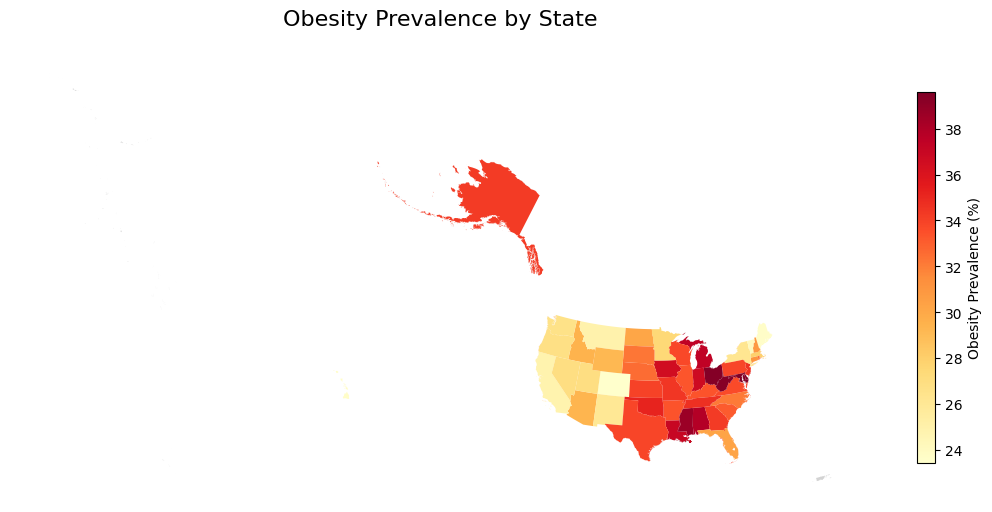

In [75]:
# First, aggregate CDC data to state level
state_health = cdc_data.groupby('StateAbbr')['OBESITY_CrudePrev'].mean().reset_index()

# Merge the health data with the shapefile
merged_map = us_map.merge(state_health, 
                         left_on='STATE',
                         right_on='StateAbbr',
                         how='left')

# Convert to an appropriate projection for the US
merged_map = merged_map.to_crs('EPSG:5070')  # USA Contiguous Albers Equal Area Conic

# Create an even larger figure with adjusted proportions
fig, ax = plt.subplots(1, 1, figsize=(10, 60))  # Increased from (20, 12)

# Plot with adjusted legend parameters
merged_map.plot(
    column='OBESITY_CrudePrev',
    legend=True,
    legend_kwds={
        'label': 'Obesity Prevalence (%)',
        'orientation': 'vertical',
        'shrink': 0.4,  # Reduced from 0.6 to make legend smaller
        'fraction': 0.02  # Make the legend bar thinner
    },
    cmap='YlOrRd',
    ax=ax,
    missing_kwds={'color': 'lightgrey'}
)

# Remove axes
ax.axis('off')

# Add title with adjusted padding
plt.title('Obesity Prevalence by State', pad=20, fontsize=16)

# Adjust layout with less padding
plt.tight_layout(pad=1.0)

In [84]:
# Create base map
m = folium.Map(
    location=[37.8, -96],
    zoom_start=4,
    tiles='cartodbpositron'
)

# Add choropleth with explicit threshold scale
folium.Choropleth(
    geo_data=merged_map,
    name='choropleth',
    data=merged_map,
    columns=['STATE', 'OBESITY_CrudePrev'],
    key_on='feature.properties.STATE',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    threshold_scale=[23, 26, 29, 32, 35, 38, 40],  # Explicit breaks based on data
    legend_name='Obesity Prevalence (%)',
    highlight=True
).add_to(m)

# styling
folium.GeoJson(
    merged_map,
    style_function=lambda x: {
        'fillOpacity': 0,
        'weight': 0.5,
        'color': '#969696'  # make border minimal gray
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['STATE', 'OBESITY_CrudePrev'],
        aliases=['State:', 'Obesity Prevalence (%)'],
        localize=True
    )
).add_to(m)

m.save('obesity_map.html')


### Above image is an interactible html file saved to the zip file

#### Now I want to include other metrics

In [87]:
# First, aggregate CDC health metrics at state level
state_health = cdc_data.groupby('StateAbbr').agg({
    'OBESITY_CrudePrev': 'mean',
    'DIABETES_CrudePrev': 'mean',
    'BPHIGH_CrudePrev': 'mean',
    'PHLTH_CrudePrev': 'mean'
}).reset_index()

# Aggregate FDA food access metrics at state level
state_food = fda_data.groupby('State').agg({
    'PCT_LACCESS_POP15': 'mean',
    'PCT_LACCESS_LOWI15': 'mean',
    'PCT_LACCESS_SNAP15': 'mean',
    'PCT_LACCESS_SENIORS15': 'mean'
}).reset_index()

# First merge health data with the map
merged_map = us_map.merge(state_health, 
                         left_on='STATE',
                         right_on='StateAbbr',
                         how='left')

# Then merge food access data
merged_map = merged_map.merge(state_food,
                            left_on='STATE',
                            right_on='State',
                            how='left')


### Food access map

In [88]:
# Create food access visualization
m_food = folium.Map(location=[37.8, -96], zoom_start=4)

folium.Choropleth(
    geo_data=merged_map,
    name='choropleth',
    data=merged_map,
    columns=['STATE', 'PCT_LACCESS_POP15'],
    key_on='feature.properties.STATE',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Population with Low Food Access (%)'
).add_to(m_food)

m_food.save('food_access_map.html')

### Health indicators map

In [89]:
# Diabetes prevalence
state_diabetes = cdc_data.groupby('StateAbbr')['DIABETES_CrudePrev'].mean().reset_index()
merged_diabetes = us_map.merge(state_diabetes, 
                             left_on='STATE', 
                             right_on='StateAbbr', 
                             how='left')

m_diabetes = folium.Map(location=[37.8, -96], zoom_start=4)
folium.Choropleth(
    geo_data=merged_diabetes,
    name='choropleth',
    data=merged_diabetes,
    columns=['STATE', 'DIABETES_CrudePrev'],
    key_on='feature.properties.STATE',
    fill_color='RdPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Diabetes Prevalence (%)'
).add_to(m_diabetes)

m_diabetes.save('diabetes_map.html')


### SNAP Recipients map

In [90]:
# SNAP recipients with low food access
m_snap = folium.Map(location=[37.8, -96], zoom_start=4)

folium.Choropleth(
    geo_data=merged_map,
    name='choropleth',
    data=merged_map,
    columns=['STATE', 'PCT_LACCESS_SNAP15'],
    key_on='feature.properties.STATE',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='SNAP Recipients with Low Food Access (%)'
).add_to(m_snap)

m_snap.save('snap_access_map.html')


### High bloodpressure map

In [97]:
# SNAP recipients with low food access
m_snap = folium.Map(location=[37.8, -96], zoom_start=4)

folium.Choropleth(
    geo_data=merged_map,
    name='choropleth',
    data=merged_map,
    columns=['STATE', 'BPHIGH_CrudePrev'],
    key_on='feature.properties.STATE',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='High Blood Pressure Prevalence (%)'
).add_to(m_snap)

m_snap.save('high_blood_pressure.html')

### Create an interactive dashboard for these maps and provide rankings in the given metrics

In [96]:
merged_map.to_file("merged_map.geojson", driver = "GeoJSON")

## Next, components are combined in a streamlit dashboard

#### New file for dashboarding below:

In [107]:
# First aggregate CDC data to state level for key health metrics
state_health = cdc_data.groupby('StateAbbr').agg({
    'OBESITY_CrudePrev': 'mean',
    'DIABETES_CrudePrev': 'mean',
    'BPHIGH_CrudePrev': 'mean',
    'PHLTH_CrudePrev': 'mean'
}).reset_index()

# Aggregate FDA data to state level for key food access metrics
# Aggregate FDA data to state level for key food access metrics
state_food = fda_data.groupby('State').agg({
    'PCT_LACCESS_POP15': 'mean',  # General population food access
    'PCT_LACCESS_LOWI15': 'mean',  # Low income food access
    'PCT_LACCESS_SNAP15': 'mean',  # SNAP recipients
    'PCT_LACCESS_SENIORS15': 'mean',  # Senior citizens
    'PCT_LACCESS_CHILD15': 'mean',  # Children
    'PCT_LACCESS_WHITE15': 'mean',  # Racial/ethnic groups
    'PCT_LACCESS_BLACK15': 'mean',
    'PCT_LACCESS_HISP15': 'mean',
    'GROCPTH16': 'mean',  # Grocery stores per 1,000 population
    'SNAPSPTH17': 'mean',  # SNAP-authorized stores per 1,000 population
    'FOODINSEC_15_17': 'mean',  # Household food insecurity
    'VLFOODSEC_15_17': 'mean'  # Very low food security
}).reset_index()


# Merge the datasets
merged_map = us_map.merge(
    state_health,
    left_on='STATE',
    right_on='StateAbbr',
    how='left'
).merge(
    state_food,
    left_on='STATE',
    right_on='State',
    how='left'
)

# Save the merged dataset
merged_map.to_file("merged_map_extended.geojson", driver='GeoJSON')

KeyError: "Column(s) ['FOODINSEC_15_17', 'GROCPTH16', 'SNAPSPTH17', 'VLFOODSEC_15_17'] do not exist"

In [104]:
print(merged_map.columns)

Index(['STATE', 'NAME', 'FIPS', 'LON', 'LAT', 'geometry', 'StateAbbr',
       'OBESITY_CrudePrev', 'DIABETES_CrudePrev', 'BPHIGH_CrudePrev',
       'PHLTH_CrudePrev', 'State', 'PCT_LACCESS_POP15', 'PCT_LACCESS_LOWI15',
       'PCT_LACCESS_SNAP15', 'PCT_LACCESS_SENIORS15', 'PCT_LACCESS_CHILD15',
       'PCT_LACCESS_WHITE15', 'PCT_LACCESS_BLACK15', 'PCT_LACCESS_HISP15'],
      dtype='object')
